# Get validation filter parameters

In [3]:
from rdkit import Chem

example_molecules = ['C1=CC=C(C=C1)CNC2=CC=CC3=C2N=CC=C3',
 'C1=CC=C(C=C1)C2=CC(=NC(=C2)C3=CC=CC=N3)C4=CC=CC=C4',
 'CCCCN(CCCC)C(=O)CO',
 'CCC(C1=CC(=C(C(=C1)OC)OC)OC)C(=O)O',
 'C#CC1=NC(=CN=C1N)Cl',
 'COC1=CC(=C(C=C1)Br)OC(F)F']

smiles_to_mol = {s: Chem.MolFromSmiles(s) for s in example_molecules}

In [4]:
import numpy as np
from laura import mcf

# Adapted from "Deep learning enables rapid identification of potent DDR1 kinase inhibitors"
all_filters = [
    mcf.LogPFilter(),
    mcf.MolecularWeightFilter(),
    mcf.HBABHBDFilter(),
    mcf.TPSAFilter(),
    mcf.NRBFilter(),
    #mcf.ToxicityFilter(),
    #mcf.TrivialRulesFilter(),
]

trivial_f = mcf.TrivialRulesFilter()

def score_molecule(mol):
    return np.array([f.get(mol) for f in all_filters]).astype(int)

def property_molecule(mol):
    base = np.array([f.get(mol) for f in all_filters]).astype(float)
    additional = np.array(trivial_f.get_all(mol)).astype(float)
    return np.concatenate((base, additional), axis=0)

{s:score_molecule(mol) for s, mol in smiles_to_mol.items()}

{'C1=CC=C(C=C1)CNC2=CC=CC3=C2N=CC=C3': array([  3, 234,   3,  24,   3]),
 'C1=CC=C(C=C1)C2=CC(=NC(=C2)C3=CC=CC=N3)C4=CC=CC=C4': array([  5, 308,   2,  25,   3]),
 'CCCCN(CCCC)C(=O)CO': array([  1, 187,   3,  40,   7]),
 'CCC(C1=CC(=C(C(=C1)OC)OC)OC)C(=O)O': array([  2, 254,   5,  64,   6]),
 'C#CC1=NC(=CN=C1N)Cl': array([  0, 153,   4,  51,   0]),
 'COC1=CC(=C(C=C1)Br)OC(F)F': array([  3, 253,   2,  18,   3])}

In [5]:
import pandas as pd

In [6]:
openpom_smiles = pd.read_csv("openpomdata.csv")["nonStereoSMILES"]
openpom_smiles_to_mol = {s: Chem.MolFromSmiles(s) for s in openpom_smiles}

In [7]:


data = {s:property_molecule(mol) for s, mol in openpom_smiles_to_mol.items()}


In [12]:
df = pd.DataFrame.from_dict(data, orient='index', 
                            columns=['logP', 'Mw', 'HBABHBD', 'TPSA', 'NRB', 'NO2', 'Heteroatoms','AromaticRings','AtomCount', 'TripleBonds'])

df

,logP,Mw,HBABHBD,TPSA,NRB,NO2,Heteroatoms,AromaticRings,AtomCount,TripleBonds
CC(O)CN,-0.6741,75.111,4.0,46.25,1.0,0.0,2.0,0.0,5.0,0.0
CCC(=O)C(=O)O,0.0501,102.089,3.0,54.37,2.0,0.0,3.0,0.0,7.0,0.0
O=C(O)CCc1ccccc1,1.7038,150.177,2.0,37.30,3.0,0.0,2.0,1.0,11.0,0.0
OCc1ccc(O)cc1,0.8845,124.139,4.0,40.46,1.0,0.0,2.0,1.0,9.0,0.0
O=Cc1ccc(O)cc1,1.2047,122.123,3.0,37.30,1.0,0.0,2.0,1.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...
O=c1[nH]cnc2c1ncn2C1OC(COP(=O)([O-])[O-])C(O)C1O.[Ca+2],-3.7967,386.270,14.0,185.68,4.0,0.0,14.0,2.0,24.0,0.0
Nc1nc2c(ncn2C2OC(COP(=O)([O-])[O-])C(O)C2O)c(=O)[nH]1.[Ca+2],-4.2145,401.285,16.0,211.70,4.0,0.0,15.0,2.0,25.0,0.0
Nc1nc2c(ncn2C2OC(COP(=O)([O-])[O-])C(O)C2O)c(=O)[nH]1.[K+].[K+],-9.8257,439.403,16.0,211.70,4.0,0.0,16.0,2.0,26.0,0.0
CCC1SC(C)=NC(C)S1,2.9669,175.322,3.0,12.36,1.0,0.0,3.0,0.0,10.0,0.0


In [13]:
def get_atom_count(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol.GetNumAtoms() if mol else None 

In [14]:
# Compute atom count for each molecule
df['Atom_Count'] = [get_atom_count(mol) for mol in df.index]

# Normalize properties by atom count
df[["N_NO2","N_Heteroatoms","N_AromaticRings"]] = df.iloc[:, -4:-1].div(df['Atom_Count'], axis=0)

In [ ]:
df.head()

,logP,Mw,HBABHBD,TPSA,NRB,NO2,Heteroatoms,AromaticRings,Atom_Count,N_NO2,N_Heteroatoms,N_AromaticRings
CC(O)CN,-0.6741,75.111,4.0,46.25,1.0,0.0,2.0,0.0,5,0.0,0.400000,0.000000
CCC(=O)C(=O)O,0.0501,102.089,3.0,54.37,2.0,0.0,3.0,0.0,7,0.0,0.428571,0.000000
O=C(O)CCc1ccccc1,1.7038,150.177,2.0,37.30,3.0,0.0,2.0,1.0,11,0.0,0.181818,0.090909
OCc1ccc(O)cc1,0.8845,124.139,4.0,40.46,1.0,0.0,2.0,1.0,9,0.0,0.222222,0.111111
O=Cc1ccc(O)cc1,1.2047,122.123,3.0,37.30,1.0,0.0,2.0,1.0,9,0.0,0.222222,0.111111


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

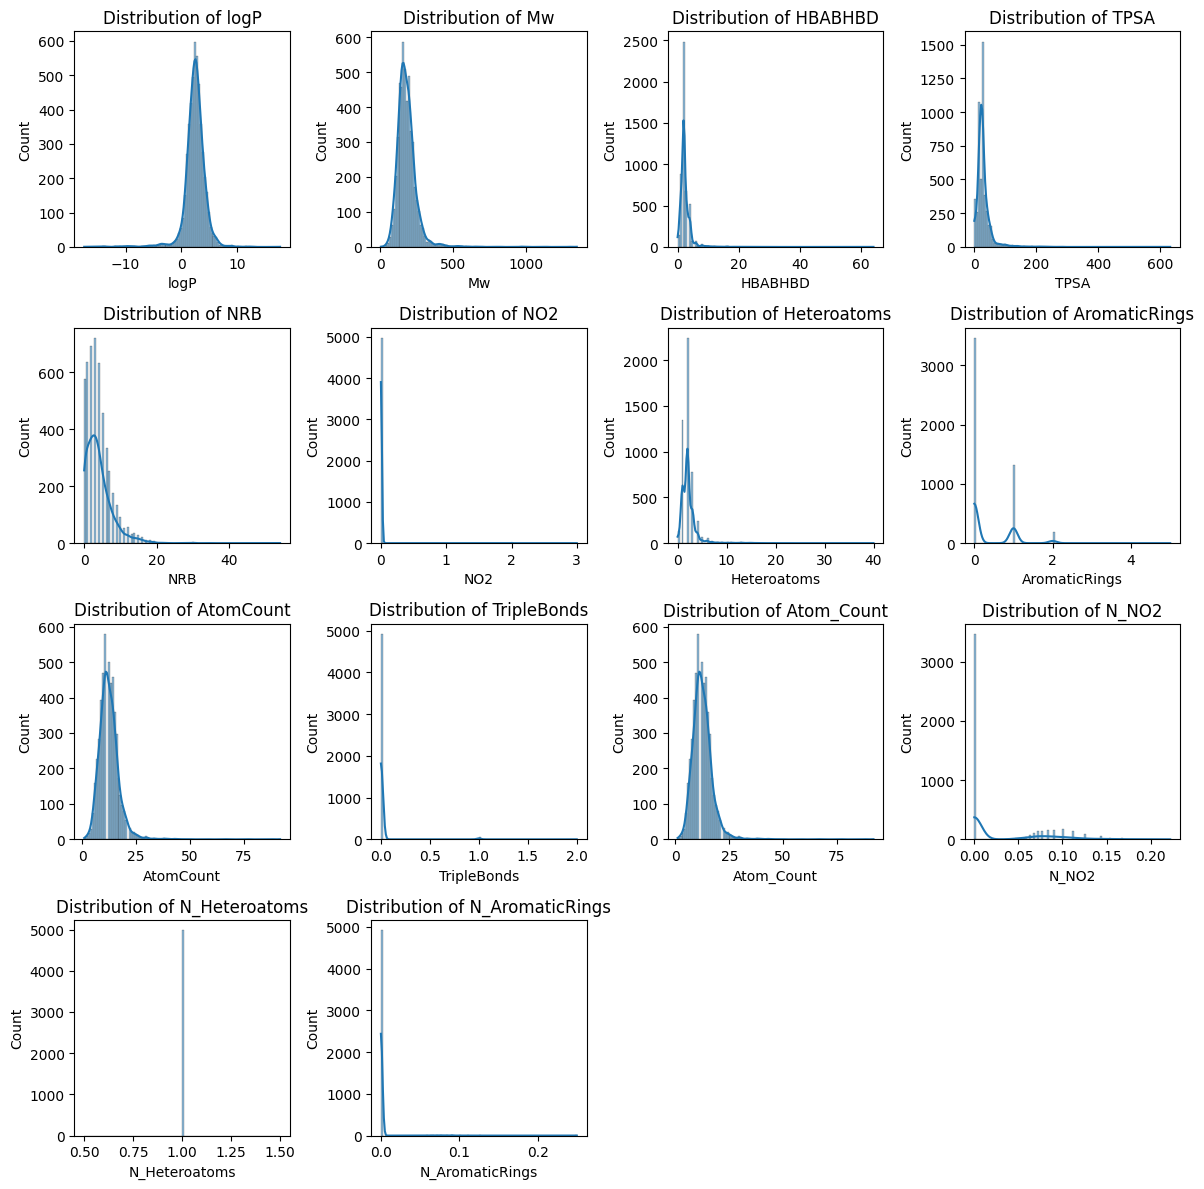

In [17]:
plt.figure(figsize=(12, 12))

# Plot distribution for each column
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)  # Create subplots
    sns.histplot(df[column], kde=True, bins=100)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

In [18]:
min_values = df.quantile(0.01)  # 1st percentile (lower bound)
max_values = df.quantile(0.99)  # 99th percentile (upper bound)



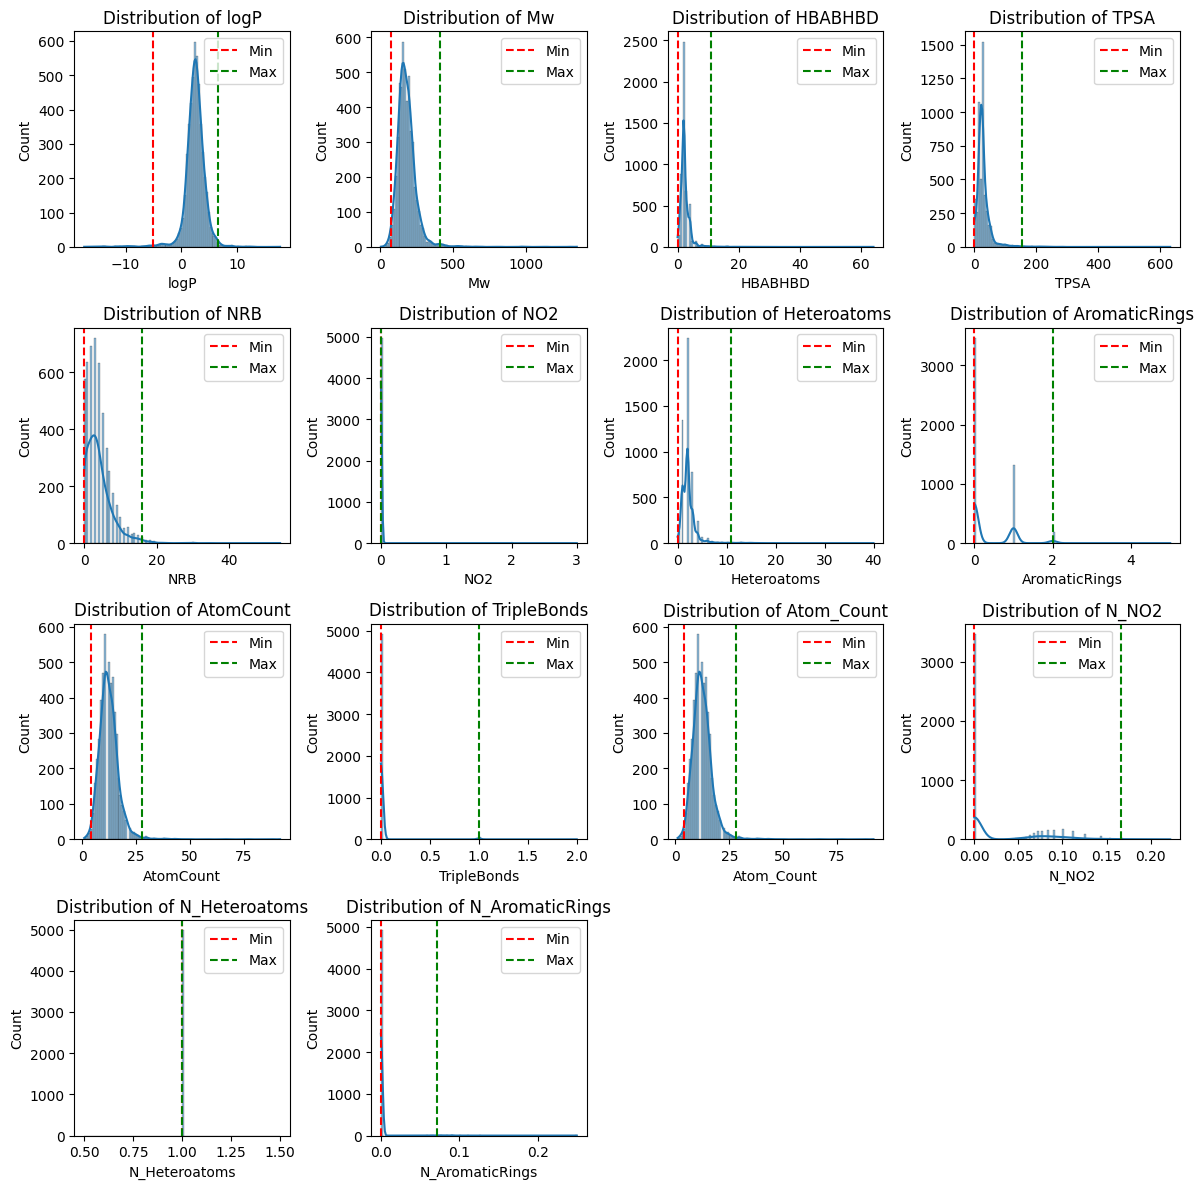

In [20]:
plt.figure(figsize=(12, 12))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True, bins=100)
    plt.axvline(min_values[column], color='r', linestyle='--', label="Min")
    plt.axvline(max_values[column], color='g', linestyle='--', label="Max")
    plt.title(f"Distribution of {column}")
    plt.legend()

plt.tight_layout()
plt.show()

In [27]:
min_values

logP               -5.100966
Mw                 72.107000
HBABHBD             0.000000
TPSA                0.000000
NRB                 0.000000
NO2                 0.000000
Heteroatoms         0.000000
AromaticRings       0.000000
Atom_Count          4.000000
N_NO2               0.000000
N_Heteroatoms       0.000000
N_AromaticRings     0.000000
Name: 0.01, dtype: float64

In [29]:
type(min_values)

pandas.core.series.Series

In [28]:
max_values

logP                 6.539522
Mw                 412.233980
HBABHBD             11.000000
TPSA               154.978800
NRB                 16.000000
NO2                  0.000000
Heteroatoms         11.000000
AromaticRings        2.000000
Atom_Count          28.000000
N_NO2                0.000000
N_Heteroatoms        1.000000
N_AromaticRings      0.166667
Name: 0.99, dtype: float64

In [29]:
min_values = df.min()
max_values = df.max()



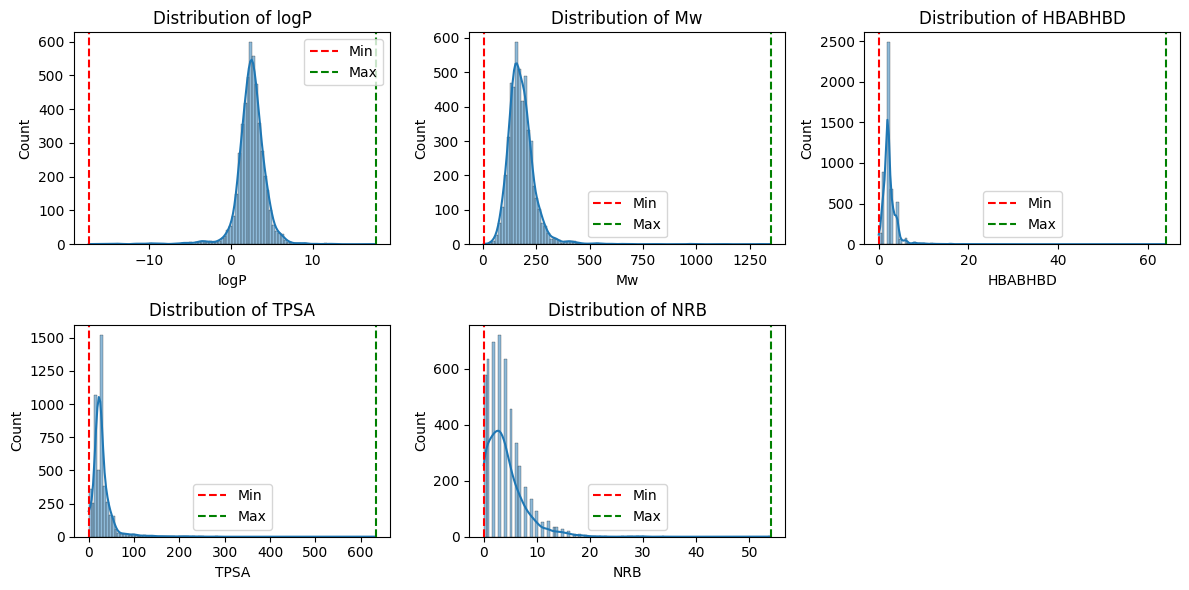

In [30]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True, bins=100)
    plt.axvline(min_values[column], color='r', linestyle='--', label="Min")
    plt.axvline(max_values[column], color='g', linestyle='--', label="Max")
    plt.title(f"Distribution of {column}")
    plt.legend()

plt.tight_layout()
plt.show()

In [31]:
min_values = df.mean() - 2 * df.std()
max_values = df.mean() + 2 * df.std()

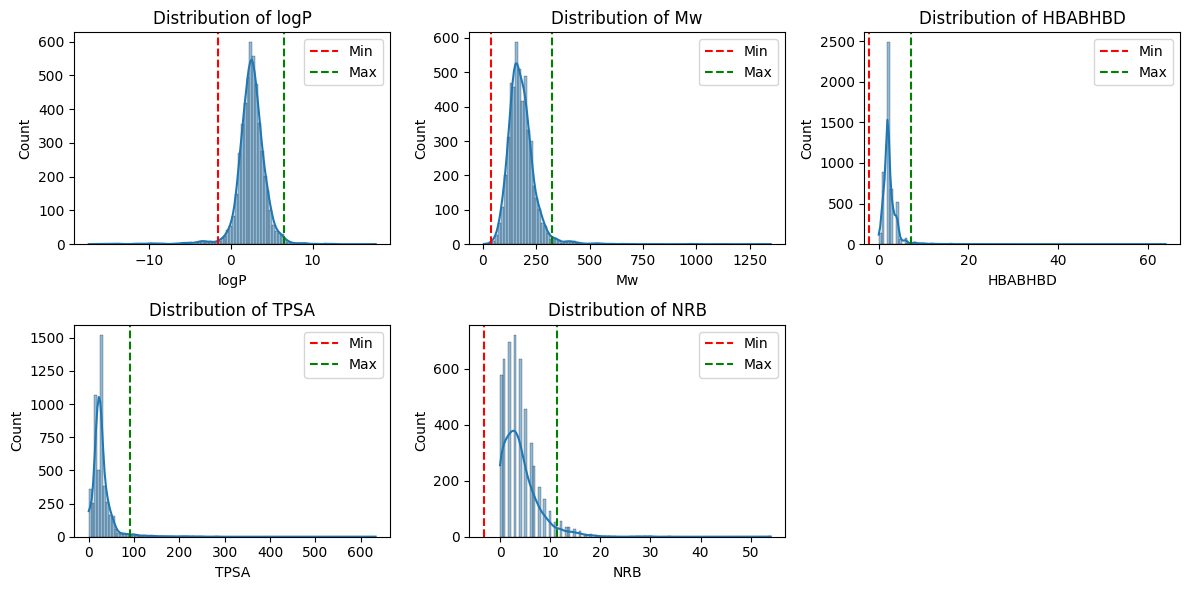

In [32]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True, bins=100)
    plt.axvline(min_values[column], color='r', linestyle='--', label="Min")
    plt.axvline(max_values[column], color='g', linestyle='--', label="Max")
    plt.title(f"Distribution of {column}")
    plt.legend()

plt.tight_layout()
plt.show()

In [30]:
df.index

Index(['CC(O)CN', 'CCC(=O)C(=O)O', 'O=C(O)CCc1ccccc1', 'OCc1ccc(O)cc1',
       'O=Cc1ccc(O)cc1', 'O=C(O)c1ccc(O)cc1', 'CC(=O)O', 'CC=O', 'CC(=O)C(C)O',
       'CC(C)=O',
       ...
       'CCC(C)C1=NC(C)C(CC)S1', 'CCC1SC(CC(C)C)=NC1C',
       'O=c1[nH]cnc2c1ncn2C1OC(COP(=O)(O)O)C(O)C1O',
       'Nc1nc2c(ncn2C2OC(COP(=O)([O-])[O-])C(O)C2O)c(=O)[nH]1.[Na+].[Na+]',
       'CN1c2c(nc(N)[nH]c2=O)NCC1CNc1ccc(C(=O)NC(CCC(=O)[O-])C(=O)[O-])cc1.[Ca+2]',
       'O=c1[nH]cnc2c1ncn2C1OC(COP(=O)([O-])[O-])C(O)C1O.[Ca+2]',
       'Nc1nc2c(ncn2C2OC(COP(=O)([O-])[O-])C(O)C2O)c(=O)[nH]1.[Ca+2]',
       'Nc1nc2c(ncn2C2OC(COP(=O)([O-])[O-])C(O)C2O)c(=O)[nH]1.[K+].[K+]',
       'CCC1SC(C)=NC(C)S1', 'CC1CCC(C(C)C)C(OCC(C)(O)CO)C1'],
      dtype='object', length=4983)

In [31]:
from laura import mcf
from rdkit import Chem
import numpy as np
from laura import fingerprint
from sklearn.ensemble import RandomForestClassifier
import pickle

In [32]:
# Load model
model_fname = "laura/odorant_classifier.pkl"
with open(model_fname,"rb") as f:
    clf = pickle.load(f)

# Fingerprint gen
mfpgen = fingerprint.make_mfpgen()

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\paulj\Desktop\Master\venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [33]:
def is_odorant(smiles):
    mfp = [fingerprint.smiles_to_embed(mfpgen, smiles)]
    return clf.predict(mfp).astype(bool)

In [36]:
has_odor = np.array([is_odorant(m) for m in df.index]).astype(bool)

In [37]:
n_odor = sum(has_odor)
n_odor

array([4763])

In [38]:
n_tot = len(has_odor)
n_tot

4983

In [39]:
per_odor = (n_odor/n_tot)*100
per_odor

array([95.58498896])